In [3]:
from gs_quant.session import GsSession
# external users should substitute their client id and secret; please skip this step if using internal jupyterhub
GsSession.use(client_id=None, client_secret=None, scopes=('run_analytics',)) 

### IR Implied Volatility Across Strikes

We look at how the implied vol changes for swaptions with varying strikes but fixed expiries.

In [2]:
from gs_quant.instrument import IRSwaption
from gs_quant.common import PayReceive
from gs_quant.markets.portfolio import Portfolio
from gs_quant.risk import IRAnnualImpliedVol
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.0f}'.format

def moneyness_curve(expiration, termination, pay_rec, ccy, min_bps, max_bps, step_size):
    eval_range =np.arange(min_bps, max_bps + step_size, step_size).tolist()
    num_instr = len(termination)
    results = pd.DataFrame(index = eval_range)
    for i in range(num_instr):
        portfolios = Portfolio([IRSwaption(pay_or_receive=pay_rec, notional_currency=ccy, termination_date=termination[i], 
                                                          expiration_date=expiration[i], strike=f'ATMF+{eval_K}') for eval_K in eval_range])
        portfolios.resolve()
        name_i = expiration[i] + termination[i] +' '+ ccy +' '+ pay_rec
        results[name_i] = portfolios.calc(IRAnnualImpliedVol).to_frame().values  * 10000 

    plt.figure(figsize=(8, 5))
    plt.plot(results)
    plt.xlabel('Moneyness (bps)')
    plt.ylabel('Implied Ann. Volatility (bps)')
    plt.legend(results.columns)

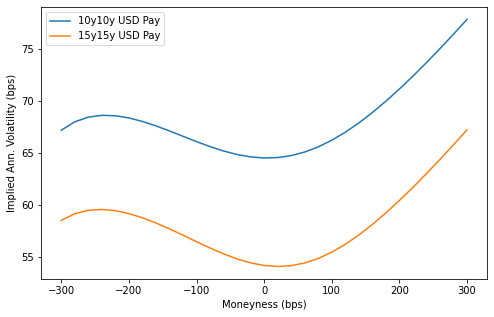

In [4]:
expiration = ['10y','15y']
termination = ['10y', '15y']
pay_rec = 'Pay'
ccy = 'USD'
min_bps = -300
max_bps = 300
step_size = 20

moneyness_curve(expiration, termination, pay_rec, ccy, min_bps, max_bps, step_size)